In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# NN
notebook_dir = os.getcwd()

# experiment_filename = '2024-10-16_09-27-00_RCA2_nni-lite_50Hz_vel_1.0_noise_c[0.0, 0.0]_mu_1.0.csv'
# experiment_filename = '2024-10-16_16-51-36_RCA2_nni-lite_50Hz_vel_1.0_noise_c[0.0, 0.0]_mu_0.7.csv'

# No Slip, With IMU0
experiment_filename = '2024-10-16_16-51-36_RCA2_nni-lite_50Hz_vel_1.0_noise_c[0.0, 0.0]_mu_0.7.csv'

df_nni = pd.read_csv(notebook_dir+'/'+experiment_filename, comment='#')
df_nni = df_nni.drop(index=0).reset_index(drop=True)

mus = np.concatenate([
    np.full(500, 1.0),  # 1.0 from index 0 to 500
    np.full(1000, 0.5),  # 0.5 from index 501 to 1000
    np.full(1499, 1.0)  # 1.0 from index 1001 to 3000
])

mus = np.full(len(df_nni), 0.7)



# Define the range to select
start, end = 500, 1600

# Select the range from the DataFrame and mus array
df_nni = df_nni.iloc[start:end].reset_index(drop=True)
mus = mus[start:end]




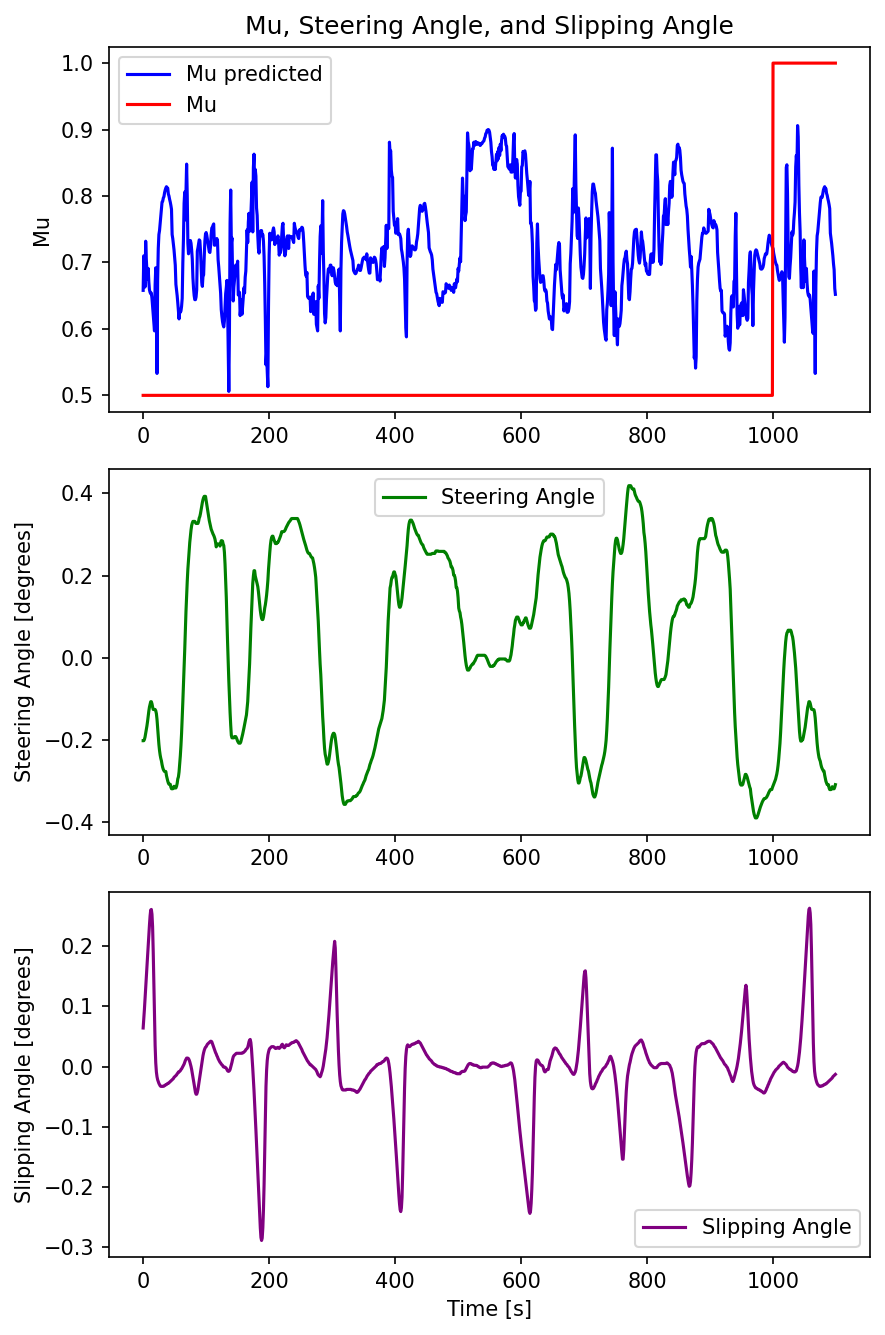

In [35]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 9), dpi=150)

# Plot mu
axs[0].plot(df_nni['mu_predicted'], color="blue", label="Mu predicted")
axs[0].plot(mus, color="red", label="Mu")
axs[0].legend()  # Add legend
axs[0].set_ylabel('Mu')
axs[0].set_title('Mu, Steering Angle, and Slipping Angle')

# Plot steering angle
axs[1].plot(df_nni['steering_angle'], color="green", label="Steering Angle")
axs[1].legend()  # Add legend
axs[1].set_ylabel('Steering Angle [degrees]')

# Plot slipping angle
axs[2].plot(df_nni['slip_angle'], color="purple", label="Slipping Angle")
axs[2].legend()  # Add legend
axs[2].set_ylabel('Slipping Angle [degrees]')
axs[2].set_xlabel('Time [s]')

# Adjust layout
plt.tight_layout()



plt.show()

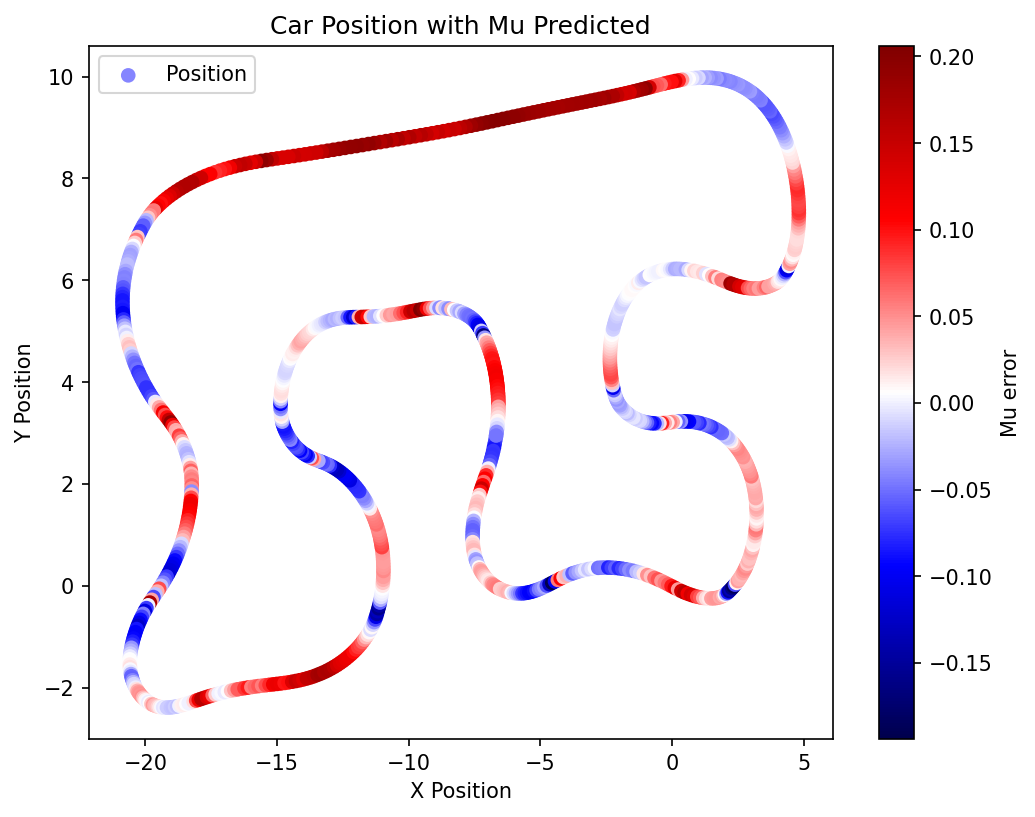

In [2]:

# Create a new figure for the x, y position plot
plt.figure(figsize=(8, 6), dpi=150)

# Scatter plot of x, y positions with color defined by mu_predicted
mu_error = df_nni['mu_predicted'] - mus
sc = plt.scatter(df_nni['pose_x'], df_nni['pose_y'], c=mu_error, cmap='seismic', label="Position")
plt.colorbar(sc, label='Mu error')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Car Position with Mu Predicted')
plt.legend()

# Show the plot
plt.show()